In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from pickle import dump

In [2]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [3]:
# load data
dataset = pd.read_csv('database_for_tensorflow.csv')
dataset.head()

,Unnamed: 0,Composition,VEC,Electronegativity_Difference,Atomic_Radius_Diff,Mixing_Enthalpy,Mixing_Entropy,E/A,EWF,Mod_Mismatch,...,Cu,Zn,Zr,Nb,Mo,Sn,Hf,Ta,W,HV
0,0,Al0.017 Cu0.328 Mn0.328 Ni0.328,9.225774,0.167533,3.617080,-0.934897,9.694725,1.102947,9817.125366,-0.023559,...,0.327672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,166.0
1,1,Al0.020 Co0.196 Cr0.196 Fe0.196 Mn0.196 Ni0.196,7.900000,0.138701,3.702726,-5.265344,13.929121,1.081360,10013.078072,-0.022279,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0
2,2,Al0.020 Co0.196 Cr0.196 Fe0.196 Mn0.196 Ni0.196,7.900000,0.138701,3.702726,-5.265344,13.929121,1.081360,10013.078072,-0.022279,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,432.0
3,3,Al0.024 Co0.244 Cr0.244 Fe0.244 Ni0.244,8.124000,0.100790,2.285452,-5.024448,12.191045,1.087280,11858.093680,-0.026248,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118.0
4,4,Al0.032 Co0.242 Cr0.161 Fe0.161 Ni0.242 Ti0.161,7.599600,0.139458,6.452588,-16.947298,13.965469,1.128138,11400.968816,-0.043780,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,717.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    601 non-null    int64  
 1   Composition                   601 non-null    object 
 2   VEC                           601 non-null    float64
 3   Electronegativity_Difference  601 non-null    float64
 4   Atomic_Radius_Diff            601 non-null    float64
 5   Mixing_Enthalpy               601 non-null    float64
 6   Mixing_Entropy                601 non-null    float64
 7   E/A                           600 non-null    float64
 8   EWF                           601 non-null    float64
 9   Mod_Mismatch                  584 non-null    float64
 10  DeltaG                        584 non-null    float64
 11  ShearModG                     584 non-null    float64
 12  Tm                            601 non-null    float64
 13  Ec   

In [5]:
# Remove unnecessary columns

dataset = dataset.drop('Composition', axis=1)
dataset = dataset.drop('Unnamed: 0', axis=1)

dataset = dataset.drop('Ec', axis=1)
dataset = dataset.drop('Mod_Mismatch', axis=1)

dataset.isna().sum()

VEC                              0
Electronegativity_Difference     0
Atomic_Radius_Diff               0
Mixing_Enthalpy                  0
Mixing_Entropy                   0
E/A                              1
EWF                              0
DeltaG                          17
ShearModG                       17
Tm                               0
Cond__AC                         0
Cond__AM                         0
Cond__HM                         0
Cond__PM                         0
Cond__WR                         0
Li                               0
Mg                               0
Al                               0
Si                               0
Sc                               0
Ti                               0
V                                0
Cr                               0
Mn                               0
Fe                               0
Ni                               0
Co                               0
Cu                               0
Zn                  

In [6]:
# Remove rows with missing values
dataset = dataset.dropna()

In [7]:
dataset.tail()

,VEC,Electronegativity_Difference,Atomic_Radius_Diff,Mixing_Enthalpy,Mixing_Entropy,E/A,EWF,DeltaG,ShearModG,Tm,...,Cu,Zn,Zr,Nb,Mo,Sn,Hf,Ta,W,HV
596,4.333333,0.115758,5.037290,2.666667,9.134370,1.316667,5701.485090,0.013762,38.333333,2266.333333,...,0.00,0.0,0.333333,0.333333,0.0,0.0,0.0,0.000000,0.0,295.0
597,4.625000,0.084104,3.841219,2.125000,10.982476,1.358750,6008.283194,0.081874,46.625000,2594.000000,...,0.00,0.0,0.125000,0.375000,0.0,0.0,0.0,0.250000,0.0,294.0
598,8.940000,0.088188,2.632617,-1.670400,13.487136,1.094200,12193.944527,0.047403,68.060000,1713.533000,...,0.18,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,541.0
599,4.333333,0.091043,5.015884,1.777778,9.134370,1.400000,5567.914722,0.095797,48.666667,2442.333333,...,0.00,0.0,0.333333,0.000000,0.0,0.0,0.0,0.333333,0.0,485.0
600,6.800000,0.150013,7.461999,-26.400000,13.381611,1.478000,10135.337998,0.129356,60.600000,1633.650000,...,0.00,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,816.0


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 600
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   VEC                           583 non-null    float64
 1   Electronegativity_Difference  583 non-null    float64
 2   Atomic_Radius_Diff            583 non-null    float64
 3   Mixing_Enthalpy               583 non-null    float64
 4   Mixing_Entropy                583 non-null    float64
 5   E/A                           583 non-null    float64
 6   EWF                           583 non-null    float64
 7   DeltaG                        583 non-null    float64
 8   ShearModG                     583 non-null    float64
 9   Tm                            583 non-null    float64
 10  Cond__AC                      583 non-null    int64  
 11  Cond__AM                      583 non-null    int64  
 12  Cond__HM                      583 non-null    int64  
 13  Cond_

In [9]:
# Split data into X and y
y = dataset['HV']
X = dataset.drop(['HV'], axis=1)

#The two following lines could be used to select only part of the columns: 
#X = dataset[['VEC','E/A', 'Ec', 'Mixing_Entropy', 'EWF', 'Mod_Mismatch', 'Mixing_Enthalpy', 'Atomic_Radius_Diff', 'Electronegativity_Difference',
#           'Cond__PM', 'Cond__AC',  'Cond__AM', 'Cond__HM', 'Cond__WR']]

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size= 0.25, 
                                                    random_state=42)

#Applying standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#The following line can be used to save the standarscaler:
#dump(sc, open('/Scaler/scaler.pkl', 'wb'))

In [10]:
# Function to build the model
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[17], reg_l2=0.01, dropout=0.2):
    model = keras.Sequential()
    options = {"input_shape": input_shape}
    model.add(keras.Input(shape=(len(X.keys()))))
    for layer in range(n_hidden):
        model.add(layers.Dense(n_neurons, kernel_regularizer=regularizers.l2(reg_l2), 
                 activation='elu'))
        model.add(layers.Dropout(dropout))
        options = {}
    model.add(keras.layers.Dense(1, **options))
    optimizer = tf.keras.optimizers.Adam(learning_rate)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

# Inicial training

In [11]:
model = build_model(n_hidden=3, n_neurons=50, learning_rate=0.0005, reg_l2=0.0001, dropout=0.2)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                1850      
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5

In [13]:
EPOCHS = 10000

history = model.fit(
  X_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()], batch_size=5)


Epoch: 0, loss:278237.8125,  mae:483.7858,  mse:278237.7812,  val_loss:245181.2969,  val_mae:449.0780,  val_mse:245181.2656,  
....................................................................................................
Epoch: 100, loss:11338.9902,  mae:82.7789,  mse:11338.9473,  val_loss:10284.8555,  val_mae:72.3639,  val_mse:10284.8164,  
....................................................................................................
Epoch: 200, loss:10258.4736,  mae:79.0732,  mse:10258.4209,  val_loss:9403.2598,  val_mae:66.5514,  val_mse:9403.2061,  
....................................................................................................
Epoch: 300, loss:8446.6758,  mae:73.8855,  mse:8446.6104,  val_loss:9653.5527,  val_mae:67.5267,  val_mse:9653.4883,  
....................................................................................................
Epoch: 400, loss:7276.0063,  mae:63.5554,  mse:7275.9336,  val_loss:8482.4990,  val_mae:64.7309,  val_mse

....................................................................................................
Epoch: 3800, loss:3280.8818,  mae:44.5884,  mse:3280.7415,  val_loss:6290.2656,  val_mae:47.5246,  val_mse:6290.1255,  
....................................................................................................
Epoch: 3900, loss:3694.7439,  mae:46.5303,  mse:3694.6006,  val_loss:6778.4722,  val_mae:50.0674,  val_mse:6778.3281,  
....................................................................................................
Epoch: 4000, loss:3334.3833,  mae:42.6712,  mse:3334.2375,  val_loss:6216.3501,  val_mae:47.9921,  val_mse:6216.2051,  
....................................................................................................
Epoch: 4100, loss:3154.6946,  mae:43.6013,  mse:3154.5481,  val_loss:6207.7529,  val_mae:47.6690,  val_mse:6207.6060,  
....................................................................................................
Epoch: 4200, lo

....................................................................................................
Epoch: 7500, loss:3270.0054,  mae:43.8288,  mse:3269.7881,  val_loss:6004.1470,  val_mae:46.3976,  val_mse:6003.9292,  
....................................................................................................
Epoch: 7600, loss:3289.9194,  mae:41.7696,  mse:3289.7002,  val_loss:5716.9048,  val_mae:45.5585,  val_mse:5716.6846,  
....................................................................................................
Epoch: 7700, loss:3068.1045,  mae:42.2783,  mse:3067.8821,  val_loss:5646.6948,  val_mae:45.0760,  val_mse:5646.4727,  
....................................................................................................
Epoch: 7800, loss:2924.2981,  mae:41.4052,  mse:2924.0730,  val_loss:5680.6270,  val_mae:46.7374,  val_mse:5680.4028,  
....................................................................................................
Epoch: 7900, lo

In [14]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
9995,3192.944092,43.598122,3192.673828,5508.623535,46.787167,5508.353516,9995
9996,3217.719482,43.385105,3217.448730,5492.217285,46.708313,5491.947266,9996
9997,2885.135986,39.592419,2884.864990,5538.256348,46.400879,5537.986328,9997
9998,3136.214844,43.378754,3135.944824,5439.001953,46.240280,5438.730957,9998
9999,2771.441406,39.229717,2771.172119,5379.547852,45.847824,5379.277344,9999


In [15]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=3)

Text(0, 0.5, 'MAE [HV]')

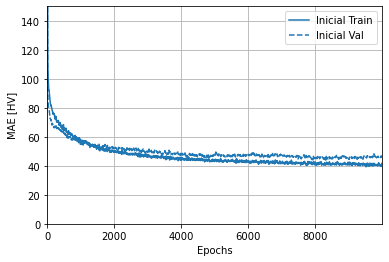

In [16]:
plotter.plot({'Inicial': history}, metric = "mae")
plt.ylim([0, 150])
plt.ylabel('MAE [HV]')

Text(0, 0.5, 'MSE [HV^2]')

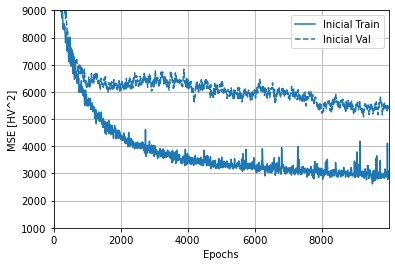

In [17]:
plotter.plot({'Inicial': history}, metric = "mse")
plt.ylim([1000, 9000])
plt.ylabel('MSE [HV^2]')

In [18]:
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} HV".format(mae))

5/5 - 0s - loss: 3070.3530 - mae: 39.7926 - mse: 3070.0825
Testing set Mean Abs Error: 39.79 HV


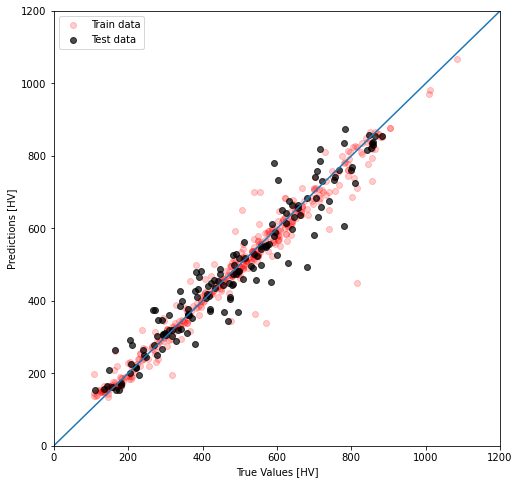

In [19]:
test_predictions = model.predict(X_test).flatten()
train_predictions = model.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'red', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='black', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [HV]')
plt.ylabel('Predictions [HV]')
lims = [0, 1200]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

# Training with early stopping

In [31]:
esmodel = build_model(n_hidden=3, n_neurons=50, learning_rate=0.0005, reg_l2=0.0001, dropout=0.2)

MAX_EPOCHS = 10000

# Early stop callback
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=1000)

early_history = esmodel.fit(X_train, y_train, 
                    epochs=MAX_EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()],
                         batch_size = 5)


Epoch: 0, loss:278511.9688,  mae:484.0410,  mse:278511.9688,  val_loss:245307.2344,  val_mae:449.0973,  val_mse:245307.2344,  
....................................................................................................
Epoch: 100, loss:13112.7607,  mae:89.7308,  mse:13112.7148,  val_loss:11316.4131,  val_mae:77.6154,  val_mse:11316.3682,  
....................................................................................................
Epoch: 200, loss:9155.8359,  mae:74.6967,  mse:9155.7754,  val_loss:10496.9521,  val_mae:71.9778,  val_mse:10496.8926,  
....................................................................................................
Epoch: 300, loss:9172.2695,  mae:73.2169,  mse:9172.1992,  val_loss:10286.8135,  val_mae:69.7858,  val_mse:10286.7451,  
....................................................................................................
Epoch: 400, loss:9432.6289,  mae:75.4532,  mse:9432.5566,  val_loss:9428.3916,  val_mae:65.5021,  val_m

Text(0, 0.5, 'MAE [HV]')

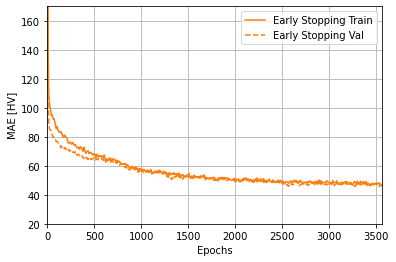

In [32]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([20, 170])
plt.ylabel('MAE [HV]')

Text(0, 0.5, 'MSE [HV]')

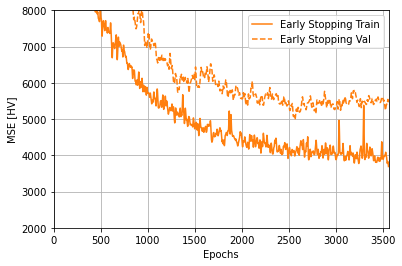

In [33]:
plotter.plot({'Early Stopping': early_history}, metric = "mse")
plt.ylim([2000, 8000])
plt.ylabel('MSE [HV]')

In [34]:
loss, mae, mse = esmodel.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} HV".format(mae))

5/5 - 0s - loss: 3499.1929 - mae: 43.5191 - mse: 3499.0396
Testing set Mean Abs Error: 43.52 HV


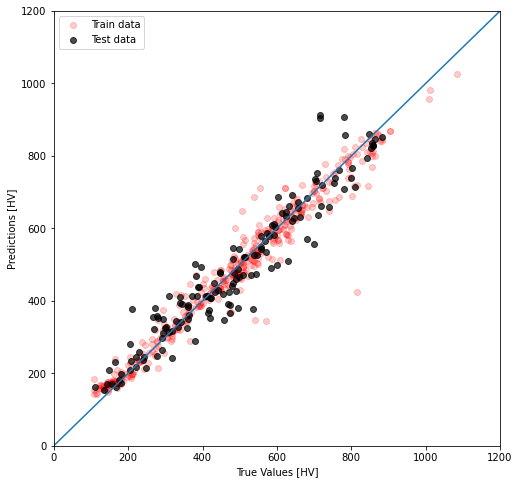

In [35]:
test_predictions = esmodel.predict(X_test).flatten()
train_predictions = esmodel.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'red', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='black', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [HV]')
plt.ylabel('Predictions [HV]')
lims = [0, 1200]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [25]:
pandas_test = pd.DataFrame(list(zip(y_test, test_predictions )), columns = ['X', 'y'])
pandas_train = pd.DataFrame(list(zip(y_train, train_predictions)), columns = ['X', 'y'])

In [26]:
pandas_test.to_csv('test_data.csv')
pandas_train.to_csv('train_data.csv')

# Saving model

In [108]:
#Choose between early stopping model or initial training
model.save('/saved_model/my_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /saved_model/my_model\assets


# Keras tuner 

In [36]:
import kerastuner as kt

In [86]:
# deixar apenas relu e elu para simplificar. antes era values=['relu', 'tanh', 'sigmoid', 'elu'],
from kerastuner import HyperModel
class RegressionHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape
    def build(self, hp):
        model = keras.Sequential()
        for i in range(hp.Int('num_layers', 1, 5)):
            model.add(
                layers.Dense(
                    units=hp.Int('units_' + str(i), min_value = 40, max_value = 200, step = 10),
                    kernel_regularizer=regularizers.l2(hp.Choice('reg_value', [0.0001,0.001,0.005,0.01,0.1,0.05])),
                    activation=hp.Choice(
                        'dense_activation',
                        values=['relu', 'elu'],
                        default='elu'),
                    input_shape=input_shape
                )
            )
        
            model.add(
                layers.Dropout(
                    hp.Float(
                        'dropout',
                        min_value=0.0,
                        max_value=0.4,
                        default=0.005,
                        step=0.05)
                )
            )
            
        model.add(layers.Dense(1))
        
        hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4, 1e-5]) 
        optimizer = keras.optimizers.Adam(hp_learning_rate)
        model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
        
        return model

In [87]:
input_shape = (len(X.keys()),)
hypermodel = RegressionHyperModel(input_shape)

In [88]:
import IPython

class ClearTrainingOutput(tf.keras.callbacks.Callback):
    def on_train_end(*args, **kwargs):
        IPython.display.clear_output(wait = True)
        
early_stop_tuner = keras.callbacks.EarlyStopping(monitor='val_loss', patience=500)        

In [89]:
tuner_bo = kt.BayesianOptimization(
            hypermodel,
            objective='val_mse',
            max_trials=50,
            seed=42,
            num_initial_points=10,
            executions_per_trial=2
    
        )
tuner_bo.search(X_train, y_train, epochs=5000, validation_split=0.2, 
                verbose=1, callbacks = [ClearTrainingOutput(), early_stop_tuner],
               batch_size=5)

best_model = tuner_bo.get_best_models(num_models=1)[0]
best_model.evaluate(X_test, y_test)

Trial 50 Complete [00h 16m 10s]
val_mse: 5495.55029296875

Best val_mse So Far: 4155.42578125
Total elapsed time: 10h 40m 19s
INFO:tensorflow:Oracle triggered exit
5/5 [==============================] - 0s 2ms/step - loss: 3015.7827 - mae: 38.9287 - mse: 2904.2571


[3015.78271484375, 38.92869567871094, 2904.257080078125]

In [90]:
best_model = tuner_bo.get_best_models(num_models=1)[0]
best_model.evaluate(X_test, y_test)
best_model.summary()

5/5 [==============================] - 0s 1ms/step - loss: 3015.7827 - mae: 38.9287 - mse: 2904.2571
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 130)               4810      
_________________________________________________________________
dropout (Dropout)            (None, 130)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               13100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 60)                6060      
_________________________________________________________________
dropout_2 (Dropout)          (None, 60)                0         
_____________________

In [96]:
# Get the optimal hyperparameters
best_hps = tuner_bo.get_best_hyperparameters(num_trials = 1)[0]

best_hps.get('num_layers')

5

In [97]:
best_hps.get('dropout')

0.1

In [98]:
best_hps.get('learning_rate')

0.0001

In [99]:
best_hps.get('dense_activation')

'elu'

In [100]:
best_hps.get('reg_value')

0.1

# Test Keras tuner model

In [102]:
# Function to build the model
def build_model_test(n_hidden=5, n_neurons= [130, 100, 60, 130, 40], learning_rate=0.001, input_shape=[17], reg_l2=0.005, dropout=0.05):
    model = keras.Sequential()
    options = {"input_shape": input_shape}
    model.add(keras.Input(shape=(len(X.keys()))))
    for layer in range(n_hidden):
        model.add(layers.Dense(n_neurons[layer], kernel_regularizer=regularizers.l2(reg_l2), 
                 activation='elu'))
        model.add(layers.Dropout(dropout))
        options = {}
    model.add(keras.layers.Dense(1, **options))
    optimizer = tf.keras.optimizers.Adam(learning_rate)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [103]:
test_model = build_model_test(n_hidden=5, n_neurons= [130, 100, 60, 130, 40], 
                              learning_rate=0.0001, input_shape=[17], reg_l2=0.1, 
                              dropout=0.1)

MAX_EPOCHS_test = 5000

# Early stop callback
early_stop_test = keras.callbacks.EarlyStopping(monitor='val_loss', patience=500)

early_history_test = test_model.fit(X_train, y_train, 
                    epochs=MAX_EPOCHS_test, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop_test, tfdocs.modeling.EpochDots()],
                         batch_size = 5)


Epoch: 0, loss:278895.0000,  mae:484.3625,  mse:278856.3750,  val_loss:246416.4062,  val_mae:450.1873,  val_mse:246377.7344,  
....................................................................................................
Epoch: 100, loss:9839.9531,  mae:77.5541,  mse:9790.2314,  val_loss:8522.4736,  val_mae:68.8936,  val_mse:8472.8057,  
....................................................................................................
Epoch: 200, loss:6856.8711,  mae:64.3541,  mse:6803.2573,  val_loss:7849.8438,  val_mae:64.8115,  val_mse:7796.1738,  
....................................................................................................
Epoch: 300, loss:6290.3286,  mae:60.9603,  mse:6233.3032,  val_loss:7072.9707,  val_mae:60.1902,  val_mse:7015.8545,  
....................................................................................................
Epoch: 400, loss:5373.0249,  mae:57.1065,  mse:5312.0098,  val_loss:6298.4824,  val_mae:56.7683,  val_mse:6237.

....................................................................................................
Epoch: 3800, loss:2282.0481,  mae:34.7551,  mse:2172.1233,  val_loss:4397.7017,  val_mae:41.8194,  val_mse:4287.6777,  
....................................................................................................
Epoch: 3900, loss:2337.4238,  mae:35.1361,  mse:2227.0339,  val_loss:4311.4800,  val_mae:41.8973,  val_mse:4201.0649,  
....................................................................................................
Epoch: 4000, loss:2220.3662,  mae:34.3740,  mse:2109.6333,  val_loss:4314.6055,  val_mae:41.6598,  val_mse:4203.9937,  
....................................................................................................
Epoch: 4100, loss:2050.5984,  mae:32.3122,  mse:1939.6852,  val_loss:4548.1855,  val_mae:42.4494,  val_mse:4437.2656,  
.................................

Text(0, 0.5, 'MAE [HV]')

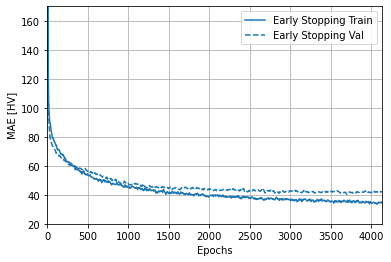

In [104]:
plotter_test = tfdocs.plots.HistoryPlotter(smoothing_std=3)
plotter_test.plot({'Early Stopping': early_history_test}, metric = "mae")
plt.ylim([20, 170])
plt.ylabel('MAE [HV]')

Text(0, 0.5, 'MSE [HV]')

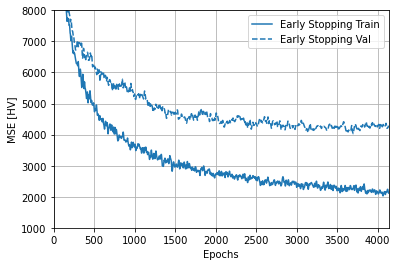

In [105]:
plotter_test.plot({'Early Stopping': early_history_test}, metric = "mse")
plt.ylim([1000, 8000])
plt.ylabel('MSE [HV]')

In [106]:
test_loss, test_mae, test_mse = test_model.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} HV".format(test_mae))

5/5 - 0s - loss: 3483.1980 - mae: 41.5486 - mse: 3372.0361
Testing set Mean Abs Error: 41.55 HV


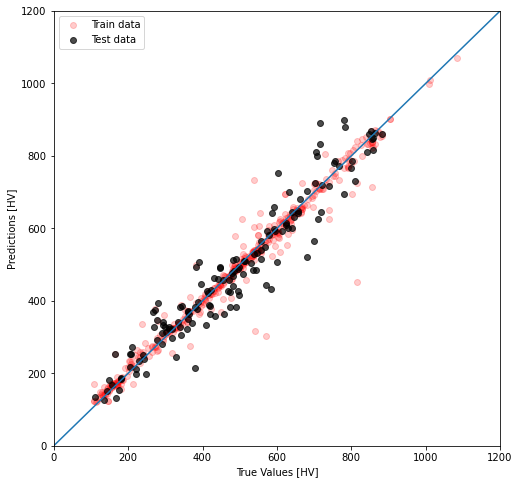

In [101]:
best_test_predictions_test = test_model.predict(X_test).flatten()
best_train_predictions_test = test_model.predict(X_train).flatten()


plt.figure(figsize=(8,8))
plt.scatter(y_train, best_train_predictions_test, c= 'red', alpha =0.2, label = 'Train data')
plt.scatter(y_test, best_test_predictions_test, c='black', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [HV]')
plt.ylabel('Predictions [HV]')
lims = [0, 1200]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)